In [1]:
import pandas as pd
from datetime import date
import os
import re
import yfinance as yf
import numpy as np
import warnings
warnings.filterwarnings('ignore')
            
import sys; sys.path.insert(0, '..')
import data.preprocessing as pp
from data.data_generator import order_stocks_by_volume, get_clustered_stocks
from utils.utils_analyze import get_price, check_index_dim
from utils.indicators import indicator_list, indicators_stock_stats
from utils.helper_training import *


In [16]:
stocks = prepare_stocks('../data/all_stocks.csv')

In [21]:
df = pd.DataFrame()
for symbol in stocks[:250]:
    stock = get_price(symbol, '2000-01-01','2010-01-01')
    df = pd.concat([df, stock])

- ABBV: Data doesn't exist for startDate = 946674000, endDate = 1262293200
- ALXN: No data found, symbol may be delisted
- ALLE: Data doesn't exist for startDate = 946674000, endDate = 1262293200
- AGN: No data found, symbol may be delisted
- APC: No data found, symbol may be delisted
- APTV: Data doesn't exist for startDate = 946674000, endDate = 1262293200
- ARNC: Data doesn't exist for startDate = 946674000, endDate = 1262293200
- BHGE: No data found, symbol may be delisted
- BBT: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BHF: Data doesn't exist for startDate = 946674000, endDate = 1262293200
- BF.B: No data found for this date range, symbol may be delisted
- CBOE: Data doesn't exist for startDate = 946674000, endDate = 1262293200
- CBG: No data found for this date range, symbol may be delisted
- CBS: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- CTL: No data found, symbol may be delisted
- CHTR: Da

In [22]:
df.to_csv('pretrain.csv')

In [36]:
from_date = date(2001,1,1)
to_date = date(2009,1,1)

In [37]:
lst1 = df[(df.Date >= pd.to_datetime(from_date)) & (
                df.Date < pd.to_datetime(from_date + timedelta(days=4)))].ticker.unique()
lst2 = df[(df.Date >= pd.to_datetime(to_date)) & (
        df.Date < pd.to_datetime(to_date + timedelta(days=4)))].ticker.unique()
existing_stocks = [value for value in lst1 if value in lst2]
training_df = df[df['ticker'].isin(existing_stocks)]

In [47]:
cluster

([3      ATVI
  28      APH
  31     ANSS
  33      APA
  35     AAPL
  51      BLK
  58     CHRW
  60      COG
  93      CSX
  94      CMI
  100      DE
  102     DVN
  120     EOG
  121     EQT
  131    ESRX
  140     FLS
  141     FLR
  142     FMC
  146     FCX
  162      HP
  164     HES
  175    ILMN
  Name: index, dtype: object,
  1       AOS
  4      ADBE
  7       AET
  8       AMG
  9       AFL
  15      ARE
  16      LNT
  18       MO
  24      AMT
  25      ABC
  34      AIV
  40     ADSK
  48      BDX
  53       BA
  62      CPB
  65      KMX
  67      CAT
  69     CERN
  72       CB
  92      CCI
  95      CVS
  97      DHR
  98      DRI
  99      DVA
  101    XRAY
  105       D
  107     DTE
  111     EMN
  112     ETN
  114     ECL
  115     EIX
  116      EW
  122     EFX
  126      EL
  133    FFIV
  134    FAST
  135     FRT
  150      GD
  157     GWW
  163    HSIC
  167     HON
  168     HRL
  169     HST
  170     HPQ
  173    IDXX
  174     ITW
  Name: index, dty

In [44]:
cluster = get_clustered_stocks(training_df, from_date, to_date)

In [48]:
stocks_train = order_stocks_by_volume(cluster[0], training_df, 5)

Stocks does not match adding new stocks


In [71]:
stocks_train[:25]

['AAPL',
 'CSX',
 'FCX',
 'ATVI',
 'ESRX',
 'HPQ',
 'MO',
 'AIV',
 'CVS',
 'ADBE',
 'GILD',
 'XOM',
 'KO',
 'HAL',
 'COP',
 'C',
 'FITB',
 'HBAN',
 'AIG',
 'HOG',
 'EBAY',
 'BSX',
 'DHI',
 'BAC',
 'AXP']

In [2]:
sn, index_df = pp.preprocess_for_train('pretrain_set', ticker_list=stocks_train[:25], 
                                       indicator_list=indicators_stock_stats, 
                                       start_date = '2001-01-01',
                                       end_date = '2010-01-01',
                                       turbulance=True,
                                       indexes=[])

NameError: name 'stocks_train' is not defined

In [2]:
dow = pd.read_csv('../datasets/dow30.csv')

In [3]:
dow.head()

,index,Date,Open,High,Low,Close,adjcp,volume,ticker,macd,...,rsi_14,cci_30,dx_30,vr,atr,dma,volume_delta,turbulence,month,day
0,0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.782836,746015200,AAPL,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
1,3234,2009-01-02,18.570000,19.520000,18.400000,19.330000,15.618546,10955700,AXP,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
2,6468,2009-01-02,42.799999,45.560001,42.779999,45.250000,33.941109,7010200,BA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
3,9702,2009-01-02,44.910000,46.980000,44.709999,46.910000,32.475796,7117200,CAT,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
4,12936,2009-01-02,16.410000,17.000000,16.250000,16.959999,12.421842,40980600,CSCO,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2


<AxesSubplot:>

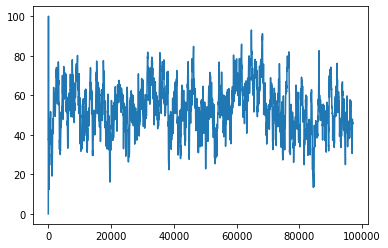

In [7]:
dow[dow.ticker=='BA'].rsi_14.plot()

In [9]:
stock = dow[dow.ticker == 'BA']
stock['pct_change'] = stock.adjcp.pct_change()

In [12]:
stock['pct_change'].head()

2           NaN
32     0.020331
62     0.003032
92    -0.033470
122    0.000670
Name: pct_change, dtype: float64

In [16]:
def create_expert_dataset(df, pct_to_buy):
    """
    set actions to perform 
    1 - buy
    0 - hold
    -1 - sell
    """
    df['action'] = 0
    for ticker in df.ticker.unique():
        stock = df[df.ticker == ticker]
        stock['pct_change'] = stock.adjcp.pct_change()
        
        for index, row in stock.iterrows():
            if index == 0:
                continue
            if row['pct_change'] >= pct_to_buy:
                df.loc[index - 1, 'action'] = 1
            elif row['pct_change'] <= -0.01:
                df.loc[index - 1, 'action'] = -1
            
            else:
                df.loc[index - 1, 'action'] = 0
    return df
            

In [18]:
expert_df = create_expert_dataset(dow, 2 /100)

In [21]:
expert_df.action.tail()

97015   -1
97016    0
97017    0
97018    0
97019    0
Name: action, dtype: int64